Question 5 -
Write a program to download the data from the given API link and then extract the following data with proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

Note - Write proper code comments wherever needed for the code understanding

Sample Data -
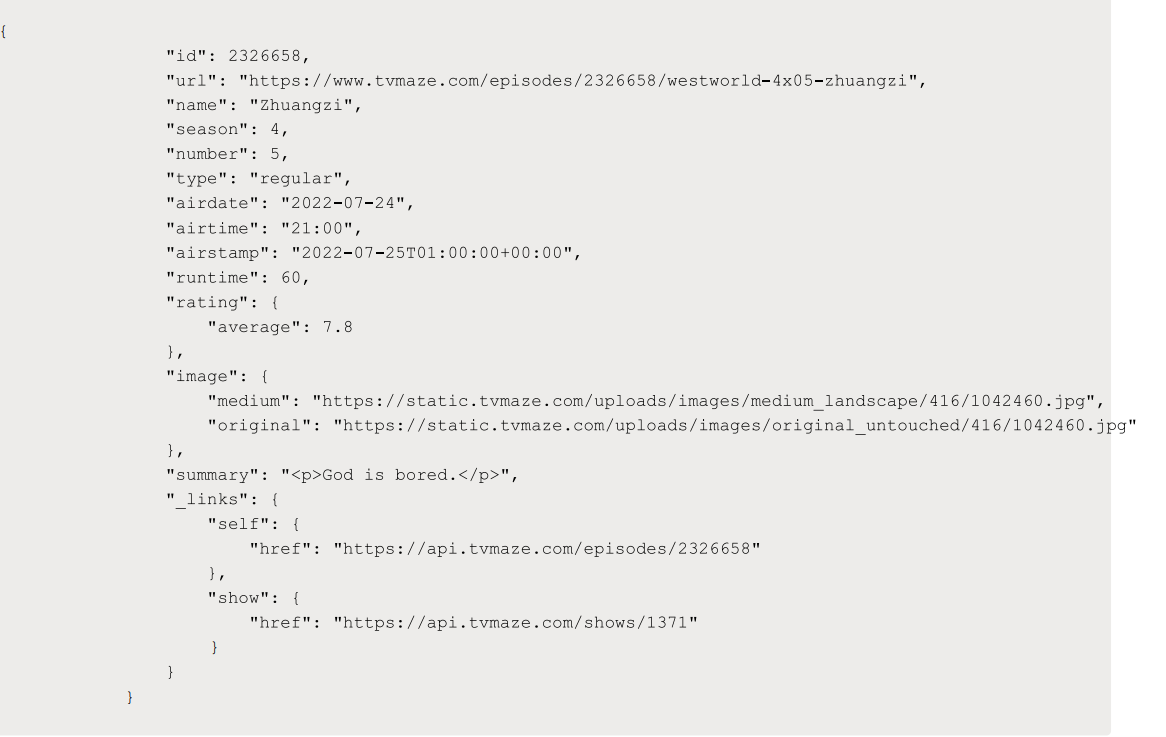

Excepted Output Data Attributes -                                                                
● id - int url - string                                                
● name - string season                          
● - int number - int                                    
● type - string airdate -                           
● date format airtime -
● 12-hour time format                                
● runtime - float                                            
● average rating - float                                             
● summary - string                                  
● without html tags                                   
● medium image link - string                                                     
● Original image link - string                                            

In [1]:
import requests
import json
from bs4 import BeautifulSoup

# Define the API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Make the HTTP request
response = requests.get(api_link)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = json.loads(response.text)

    # Extract the show information
    show_id = data["id"]
    show_url = data["url"]
    show_name = data["name"]
    show_type = data["type"]
    show_summary = BeautifulSoup(data["summary"], "html.parser").get_text()
    show_image_medium = data["image"]["medium"]
    show_image_original = data["image"]["original"]

    # Extract the episode information
    episodes = data["_embedded"]["episodes"]
    extracted_data = []

    for episode in episodes:
        episode_id = episode["id"]
        episode_url = episode["url"]
        episode_name = episode["name"]
        episode_season = episode["season"]
        episode_number = episode["number"]
        episode_airdate = episode["airdate"]
        episode_airtime = episode["airtime"]
        episode_runtime = episode["runtime"]
        episode_rating = episode["rating"]["average"]
        episode_summary = BeautifulSoup(episode["summary"], "html.parser").get_text()
        episode_image_medium = episode["image"]["medium"]
        episode_image_original = episode["image"]["original"]

        # Format the extracted data
        extracted_data.append({
            "id": episode_id,
            "url": episode_url,
            "name": episode_name,
            "season": episode_season,
            "number": episode_number,
            "type": episode["type"],
            "airdate": episode_airdate,
            "airtime": episode_airtime,
            "runtime": episode_runtime,
            "rating": episode_rating,
            "summary": episode_summary,
            "medium_image_link": episode_image_medium,
            "original_image_link": episode_image_original
        })

    # Print the extracted data
    print("Show Information:")
    print(f"ID: {show_id}")
    print(f"URL: {show_url}")
    print(f"Name: {show_name}")
    print(f"Type: {show_type}")
    print(f"Summary: {show_summary}")
    print(f"Medium Image Link: {show_image_medium}")
    print(f"Original Image Link: {show_image_original}")
    print()
    print("Episode Information:")
    for episode_data in extracted_data:
        print(f"ID: {episode_data['id']}")
        print(f"URL: {episode_data['url']}")
        print(f"Name: {episode_data['name']}")
        print(f"Season: {episode_data['season']}")
        print(f"Number: {episode_data['number']}")
        print(f"Type: {episode_data['type']}")
        print(f"Airdate: {episode_data['airdate']}")
        print(f"Airtime: {episode_data['airtime']}")
        print(f"Runtime: {episode_data['runtime']}")
        print(f"Rating: {episode_data['rating']}")
        print(f"Summary: {episode_data['summary']}")
        print(f"Medium Image Link: {episode_data['medium_image_link']}")
        print(f"Original Image Link: {episode_data['original_image_link']}")
        print()
else:
    print("Error occurred while making the request")


Show Information:
ID: 1371
URL: https://www.tvmaze.com/shows/1371/westworld
Name: Westworld
Type: Scripted
Summary: Westworld is a dark odyssey about the dawn of artificial consciousness and the evolution of sin. Set at the intersection of the near future and the reimagined past, it explores a world in which every human appetite, no matter how noble or depraved, can be indulged.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_portrait/445/1113927.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/445/1113927.jpg

Episode Information:
ID: 869671
URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Name: The Original
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 18